In [1]:
from holisticai.benchmark import BiasMitigationBenchmark
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
for task_type in ["binary_classification", "multiclass", "regression", "clustering"]:
        for stage in ["preprocessing", "inprocessing", "postprocessing"]:
            if task_type == "binary_classification" and stage != "preprocessing":
                continue
            benchmark = BiasMitigationBenchmark(task_type, stage)
            if not os.path.exists(f"results/tab"):
                os.makedirs(f"results/tab")
            benchmark.get_table().T.to_latex(f'results/tab/{task_type}_{stage}.tex', float_format="%.4f")
            if not os.path.exists(f"results/fig"):
                os.makedirs(f"results/fig")
            benchmark.get_plot()
            plt.savefig(f'results/fig/{task_type}_{stage}.pdf', bbox_inches='tight')
            plt.close()


In [14]:
benchmark = BiasMitigationBenchmark("binary_classification", "preprocessing")
from holisticai.bias.mitigation import CorrelationRemover

sensitive_results = pd.DataFrame()
for alpha in tqdm(np.linspace(0, 1, 101)):
    my_mitigator = CorrelationRemover(alpha=alpha)
    my_mitigator.__class__.__name__ = f"CorrelationRemover: alpha={alpha:.1f}"
    my_results = benchmark.run(custom_mitigator=my_mitigator)
    sensitive_results = pd.concat([sensitive_results, my_results[f"CorrelationRemover: alpha={alpha:.1f}"]], axis=1)
sensitive_results.to_csv("results/alpha_sensitive_analysis_correlation_remover.csv")

 57%|█████▋    | 58/101 [02:30<01:46,  2.47s/it]/home/kcosta/.local/share/hatch/env/virtual/holisticai/6RE4VnP4/holisticai/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|██████████| 101/101 [04:17<00:00,  2.55s/it]


The $\alpha$ parameter to control how much to filter, for alpha=1.0 we filter out. all information while for alpha=0.0 we don't apply any. In this experiment we apply a range of 1000 alpha values from 0 to 1 and evaluate how the mean score for all datasets used in the benchmark are affected. 

[]

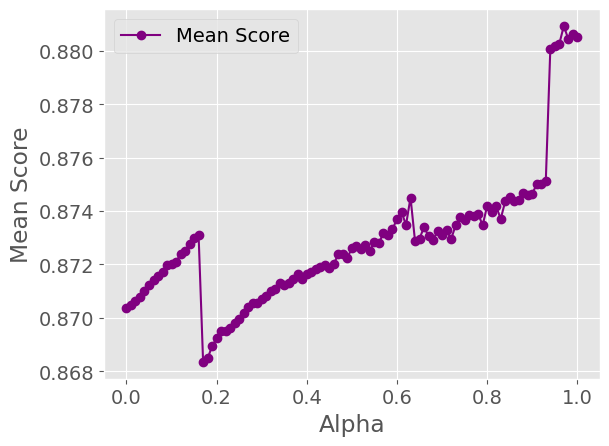

In [4]:
data = pd.read_csv("results/alpha_sensitive_analysis_correlation_remover.csv", index_col=0)
mean_score = data[:1].T
plt.plot(np.linspace(0, 1, 101), mean_score["Mean Score"], label="Mean Score", marker="o", color='purple')
plt.xlabel("Alpha")
plt.ylabel("Mean Score")
plt.legend()
plt.savefig(f'results/fig/binary_classification_preprocessing_sensitivity.pdf', bbox_inches='tight')
plt.plot()